# Mushroom Classification🍄
In this file, I use the [Mushroom Classification Dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification) 
 




>About this file
* Attribute Information: 
1. classes: edible=e, poisonous=p (Target)
2. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
3. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
4. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u,red=e, white=w, yellow=y
5. bruises: bruises=t, no=f
6. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
7. gill-attachment: attached=a, descending=d, free=f, notched=n
8. gill-spacing: close=c, crowded=w, distant=d
9. gill-size: broad=b, narrow=n
10. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
11. stalk-shape: enlarging=e, tapering=t
12. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
13. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
14. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
15. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
16. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
17. veil-type: partial=p, universal=u
18. veil-color: brown=n, orange=o, white=w, yellow=y
19. ring-number: none=n, one=o, two=t
20. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
21. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
22. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
23. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

## STEP1:  Import Libraries & Load Data
----

In [ ]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#mount drive to read the csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the csv file 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mushrooms.csv')

## STEP2: Exploration Phase
---

In [ ]:
data.shape #how many rows and columns are in the data?

(8124, 23)

In [ ]:
pd.set_option("display.max_columns", 50) #to change the default number of columns to be displayed
pd.set_option("display.max_rows", 50) #to change the default number of columns to be displayed
data.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4448,p,x,y,y,f,f,f,c,b,h,e,b,k,k,b,b,p,w,o,l,h,y,g
6179,p,f,s,e,f,y,f,c,n,b,t,?,s,s,p,w,p,w,o,e,w,v,l
2854,e,f,f,n,t,n,f,c,b,w,t,b,s,s,g,g,p,w,o,p,n,y,d
4581,p,x,y,g,f,f,f,c,b,p,e,b,k,k,n,n,p,w,o,l,h,v,p
4543,p,f,f,y,f,f,f,c,b,h,e,b,k,k,p,p,p,w,o,l,h,v,d


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [ ]:
data[data.eq("?").any(1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,e,?,s,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,t,?,k,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,e,?,s,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,t,?,k,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,t,?,s,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


## STEP3: Data Preprocessing
----



### 1. First: Convert columns to be numeric & Separate features and target columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
categ = ['class','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)
futures = data.iloc[:,1:]
target = data.iloc[:,0]

### 2. Second:  Split the dataset for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(futures, target, test_size=0.3, random_state=0) #random_state=0 to get the same train and test sets across different executions

## STEP4: Model Building
----

### 1. Model One: Decision Tree Classification Algorithm🌳

In [ ]:
!pip install scikit-plot

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier() #create object
tree.fit(x_train, y_train) #train the object

tree_pred = tree.predict(x_test) 
tree_accuracy = accuracy_score(y_test, tree_pred) #calculate the accuracy score

print(f"Accuracy Score of Tree Classification Algorithm is: {tree_accuracy}")
print("Accuracy Score of Tree Classification Algorithm is: {}%".format(tree_accuracy*100))

Accuracy Score of Tree Classification Algorithm is: 1.0
Accuracy Score of Tree Classification Algorithm is: 100.0%


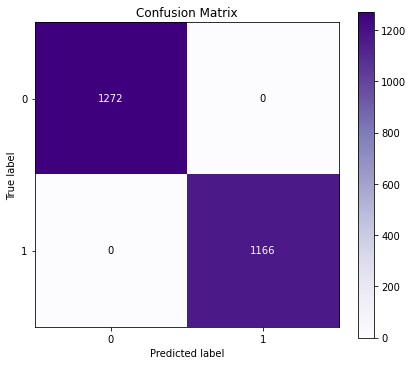

In [ ]:
import scikitplot as skplt
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, tree_pred, title="Confusion Matrix", ax=ax1, cmap='Purples')
plt.show()

### 2. Model two: Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier() #create object
forest.fit(x_train, y_train) #train the object

forest_pred = forest.predict(x_test)
forest_accuracy = accuracy_score(y_test, forest_pred) #calculate the accuracy score

print("Accuracy Score of Random Forest Algorithm is: {:0.2f}%".format(forest_accuracy*100))

Accuracy Score of Random Forest Algorithm is: 100.00%


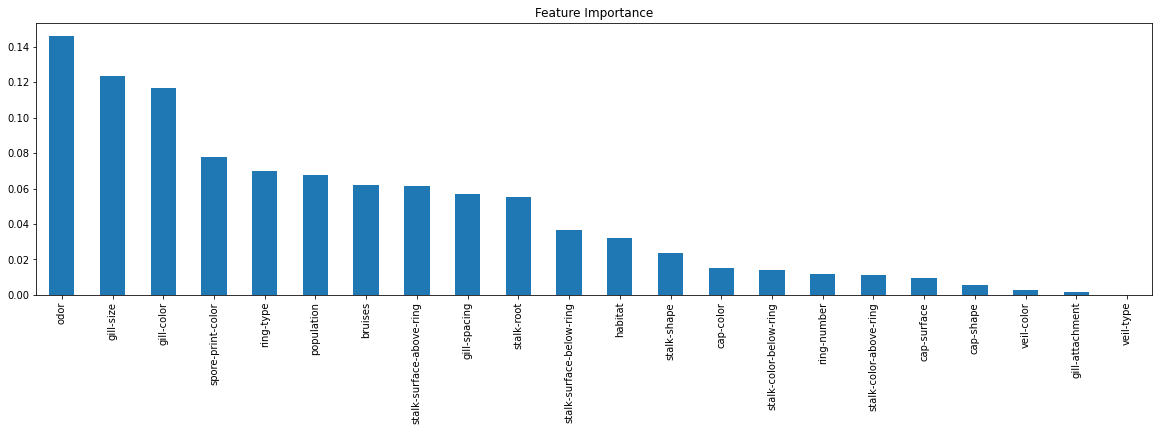

In [ ]:
forest = RandomForestClassifier() #create object
forest.fit(x_train, y_train) #train the object
feature_scores = pd.Series(forest.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores.plot(kind='bar', figsize=(20,5), title='Feature Importance')
plt.show()

In [ ]:
x_train = x_train.loc[:, ['odor', 'gill-color', 'gill-size', 'spore-print-color', 'ring-type', 'population', 'stalk-root', 'bruises']]
x_test = x_test.loc[:, ['odor', 'gill-color', 'gill-size', 'spore-print-color', 'ring-type', 'population', 'stalk-root', 'bruises']]

forest = RandomForestClassifier() #create object
forest.fit(x_train, y_train) #train the object

forest_pred = forest.predict(x_test)
forest_accuracy = accuracy_score(y_test, forest_pred) #calculate the accuracy score

print("Accuracy Score of Random Forest Algorithm After feature_importances is: {:0.4f}%".format(forest_accuracy*100))

Accuracy Score of Random Forest Algorithm After feature_importances is: 100.0000%


In [ ]:
import pickle
pickle.dump(forest, open("mmodel.pkl", "wb")) #save the model

### 3. Model Three: Logistic Regression Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
regression.fit(x_train, y_train)

regression_pred = regression.predict(x_test)
regression_accuracy = accuracy_score(y_test, regression_pred)

print(f"Accuracy Score of Logistic Regression Algorithm is: {regression_accuracy}")
print("Accuracy Score of Logistic Regression Algorithm is: {}%".format(regression_accuracy*100))

Accuracy Score of Logistic Regression Algorithm is: 0.9011484823625923
Accuracy Score of Logistic Regression Algorithm is: 90.11484823625922%


### 4. Model Four: K-Nearest Neighbor(KNN) Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

print(f"Accuracy Score of K-Nearest Neighbor Algorithm is: {knn_accuracy}")
print("Accuracy Score of K-Nearest Neighbor Algorithm is: {}%".format(knn_accuracy*100))

Accuracy Score of K-Nearest Neighbor Algorithm is: 1.0
Accuracy Score of K-Nearest Neighbor Algorithm is: 100.0%


### 5. Model Five: Support Vector Machines(SVM) algorithm.

In [ ]:
from sklearn import svm

svc = svm.SVC(kernel='linear')
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test, svc_pred)

print("Accuracy Score of SVM algorithm Algorithm is: {:0.2f}%".format(svc_accuracy*100))

Accuracy Score of SVM algorithm Algorithm is: 95.24%


### 6. Model Six: Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

nb_pred = nb.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

print("Accuracy Score of Naive Bayes Algorithm is: {:0.2f}%".format(nb_accuracy*100))

Accuracy Score of Naive Bayes Algorithm is: 84.99%


### 7. Model Seven: K-Means Algorithm

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2) 
kmeans.fit(x_train, y_train)

kmeans_pred = kmeans.predict(x_test)
kmeans_accuracy = accuracy_score(y_test, kmeans_pred)

print(f"Accuracy Score of K-Means Algorithm is: {kmeans_accuracy}")
print("Accuracy Score of K-Means Algorithm is: {}%".format(kmeans_accuracy*100))

Accuracy Score of K-Means Algorithm is: 0.712059064807219
Accuracy Score of K-Means Algorithm is: 71.20590648072191%


In [ ]:
from google.colab import files
data.to_csv('data.csv') 
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>